### Importação dos dados

#### A primeira etapa é necessário a importação do dataset do novo projeto da empresa Atlas com as bibliotecas necessárias que serão uitlizadas

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
#Definição do estilo do seaborn
sns.set_style("whitegrid")

#Importação do dataset -dados_assinaturas-
df = pd.read_excel("dados_assinaturas.xlsx")

/tmp/ipykernel_9774/3336980133.py:5: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  df = pd.read_excel("dados_assinaturas.xlsx")


### Análise inicial dos dados

#### O objetivo desta etapa é verificar como estão situado os dados e com isso permitir um entendimento de como os dados estão estruturados, na qual facilita a realização da nossa análise

In [9]:
df.shape

(2027, 14)

In [10]:
df.head()

,Profile ID,Profile Created At,Profile Deleted At,Plan Code,Payment Method,Charge Value,Subscription Status,Charge Day,Last Charge At,Next Charge At,Subscription Canceled At,Cancel Reason,Subscripion_Created_At,Estado
0,473128,2021-07-16 12:45:36,NaT,plano D,CREDIT_CARD,59.9,DRAFT,19,NaN,NaT,NaT,NaN,2021-07-19 18:45:21,Rio de Janeiro
1,315949,2021-07-14 11:01:43,NaT,plano A,CREDIT_CARD,89.9,CANCELED,23,2021-07-23,2021-07-23,2021-07-23,PAYMENT FAILED,2021-07-23 20:05:14,Rio de Janeiro
2,293763,2018-12-21 04:34:25,NaT,plano B,CREDIT_CARD,359.9,CANCELED,24,2021-07-24,2021-07-24,2021-07-27,USER SUSPENDED,2021-07-24 21:34:55,Bahia
3,124763,2021-01-24 07:52:57,NaT,plano D,CREDIT_CARD,59.9,CANCELED,25,NaN,NaT,2021-07-04,ADMIN CANCELED,2021-07-25 01:04:58,Rio de Janeiro
4,391446,2021-01-24 07:52:57,NaT,plano A,CREDIT_CARD,99.9,CANCELED,25,NaN,NaT,2021-07-04,ADMIN CANCELED,2021-07-25 01:05:05,Rio de Janeiro


Logo de início, verificamos que as colunas do dataset estão em inglês, a partir disso iremos renomeá-las para a língua portuguesa 

In [11]:
#Renomeando as colunas para PT-BR, a partir da criação de um dicionário
trad = {'Profile ID': 'id_Perfil',
        'Profile Created At': 'perfil_criado_em',
        'Profile Deleted At': 'perfil_excluido_em',
        'Plan Code': 'tipo_plano',
        'Payment Method': 'forma_pagamento',
        'Charge Value': 'valor_assinatura',
        'Subscription Status': 'status_inscricao',
        'Charge Day': 'dia_pagamento',
        'Last Charge At': 'ultimo_pagamento_em',
        'Next Charge At': 'proximo_pagamento_em',
        'Subscription Canceled At': 'inscricao_cancelada_em',
        'Cancel Reason': 'motivo_cancelamento',
        'Subscripion_Created_At': 'inscricao_realizada_em',
        'Estado': 'estado'
}

#Tradução PTBR Colunas
df_2 = df.rename(columns=trad)

#Linhas iniciais do dataset já traduzido
df_2.head()

,id_Perfil,perfil_criado_em,perfil_excluido_em,tipo_plano,forma_pagamento,valor_assinatura,status_inscricao,dia_pagamento,ultimo_pagamento_em,proximo_pagamento_em,inscricao_cancelada_em,motivo_cancelamento,inscricao_realizada_em,estado
0,473128,2021-07-16 12:45:36,NaT,plano D,CREDIT_CARD,59.9,DRAFT,19,NaN,NaT,NaT,NaN,2021-07-19 18:45:21,Rio de Janeiro
1,315949,2021-07-14 11:01:43,NaT,plano A,CREDIT_CARD,89.9,CANCELED,23,2021-07-23,2021-07-23,2021-07-23,PAYMENT FAILED,2021-07-23 20:05:14,Rio de Janeiro
2,293763,2018-12-21 04:34:25,NaT,plano B,CREDIT_CARD,359.9,CANCELED,24,2021-07-24,2021-07-24,2021-07-27,USER SUSPENDED,2021-07-24 21:34:55,Bahia
3,124763,2021-01-24 07:52:57,NaT,plano D,CREDIT_CARD,59.9,CANCELED,25,NaN,NaT,2021-07-04,ADMIN CANCELED,2021-07-25 01:04:58,Rio de Janeiro
4,391446,2021-01-24 07:52:57,NaT,plano A,CREDIT_CARD,99.9,CANCELED,25,NaN,NaT,2021-07-04,ADMIN CANCELED,2021-07-25 01:05:05,Rio de Janeiro


É possível verificar que os dados de colunas específicas também estão em inglês. Vamos verificar os nomes a partir do método unique(), que retorna os valores únicos da coluna específica

In [12]:
#Valores únicos da coluna forma de pagamento
df_2['forma_pagamento'].unique()

array(['CREDIT_CARD'], dtype=object)

In [13]:
#Valores únicos da coluna status da inscrição
df_2['status_inscricao'].unique()

array(['DRAFT', 'CANCELED', 'ACTIVE', 'CANCEL QUEUED'], dtype=object)

In [14]:
#Valores únicos da coluna motivo de cancelamento
df_2['motivo_cancelamento'].unique()

array([nan, 'PAYMENT FAILED', 'USER SUSPENDED', 'ADMIN CANCELED',
       'MOIP CANCELED', 'USER DELETED', 'USER PENALTY', 'USER CANCELED',
       'CHARGEBACK', 'USER BANED'], dtype=object)

Agora irei realizar a tradução para PT-BR dos valores único encontrados acima criando dicionários para cada variável.

In [15]:
#Tradução dos dados das colunas específicas
cartao_de_credito = {'CREDIT_CARD': 'cartao_de_credito'}
status_insc = {'DRAFT': 'em_aberto', 
               'CANCELED': 'cancelado', 
               'ACTIVE': 'ativo', 
               'CANCEL QUEUED': 'fila_para_cancelar'
}
motivo_cancel = {'PAYMENT FAILED': 'falha_pagamento',
                 'USER SUSPENDED': 'usuario_suspenso',
                 'ADMIN CANCELED': 'cancelado_pelo_adm',                 
                 'MOIP CANCELED': 'cancelado_moip',
                 'USER DELETED': 'usuario_deletado',
                 'USER PENALTY': 'usuario_punido',
                 'USER CANCELED': 'usuario_cancelado',
                 'CHARGEBACK': 'estorno',
                 'USER BANED': 'usuario_banido'
}

Agora será realizado a substituição dos dados em inglês para português com a função map().

In [16]:
#Substituindo os dados 
df_2['forma_pagamento'] = df_2['forma_pagamento'].map(cartao_de_credito) 
df_2['status_inscricao'] = df_2['status_inscricao'].map(status_insc)
df_2['motivo_cancelamento'] = df_2['motivo_cancelamento'].map(motivo_cancel)   

In [17]:
#Linhas iniciais do dataset já traduzido
df_2.head()

,id_Perfil,perfil_criado_em,perfil_excluido_em,tipo_plano,forma_pagamento,valor_assinatura,status_inscricao,dia_pagamento,ultimo_pagamento_em,proximo_pagamento_em,inscricao_cancelada_em,motivo_cancelamento,inscricao_realizada_em,estado
0,473128,2021-07-16 12:45:36,NaT,plano D,cartao_de_credito,59.9,em_aberto,19,NaN,NaT,NaT,NaN,2021-07-19 18:45:21,Rio de Janeiro
1,315949,2021-07-14 11:01:43,NaT,plano A,cartao_de_credito,89.9,cancelado,23,2021-07-23,2021-07-23,2021-07-23,falha_pagamento,2021-07-23 20:05:14,Rio de Janeiro
2,293763,2018-12-21 04:34:25,NaT,plano B,cartao_de_credito,359.9,cancelado,24,2021-07-24,2021-07-24,2021-07-27,usuario_suspenso,2021-07-24 21:34:55,Bahia
3,124763,2021-01-24 07:52:57,NaT,plano D,cartao_de_credito,59.9,cancelado,25,NaN,NaT,2021-07-04,cancelado_pelo_adm,2021-07-25 01:04:58,Rio de Janeiro
4,391446,2021-01-24 07:52:57,NaT,plano A,cartao_de_credito,99.9,cancelado,25,NaN,NaT,2021-07-04,cancelado_pelo_adm,2021-07-25 01:05:05,Rio de Janeiro


Finalizando essa primeira análise verificando as últimas linhas do nosso dataset

In [18]:
#As últimas linhas do dataset
df_2.tail()

,id_Perfil,perfil_criado_em,perfil_excluido_em,tipo_plano,forma_pagamento,valor_assinatura,status_inscricao,dia_pagamento,ultimo_pagamento_em,proximo_pagamento_em,inscricao_cancelada_em,motivo_cancelamento,inscricao_realizada_em,estado
2022,1299771,2021-10-26 10:23:16,NaT,plano A,cartao_de_credito,89.9,cancelado,26,2021-06-29 00:00:00,2021-07-26,2021-07-21,usuario_suspenso,2021-06-29 12:37:09,Minas Gerais
2023,1299770,2021-10-26 10:20:32,NaT,plano D,cartao_de_credito,53.9,cancelado,26,2021-06-29 00:00:00,2021-07-26,2021-07-21,usuario_suspenso,2021-06-29 12:37:13,São Paulo
2024,1299769,2021-10-26 10:18:38,NaT,plano A,cartao_de_credito,89.9,cancelado,26,2021-06-26 00:00:00,2021-07-26,2021-07-12,usuario_cancelado,2021-06-29 12:40:01,São Paulo
2025,1299768,2021-10-26 10:18:35,NaT,plano D,cartao_de_credito,53.9,cancelado,26,2021-06-26 00:00:00,2021-07-26,2021-07-12,usuario_cancelado,2021-06-29 12:40:06,Santa Catarina
2026,1299767,2021-10-26 10:17:46,NaT,plano A,cartao_de_credito,89.9,cancelado,26,2021-06-29 00:00:00,2021-07-26,2021-07-26,falha_pagamento,2021-06-29 13:35:02,Rio Grande do Sul


### Limpeza dos dados

#### Agora será realizado algumas análises importantes referente ao dataset apresentado, que será importante para a conclusão do desafio.

#### Tamanho e tipo dos atributos do dataset

In [19]:
#Tamanho do dataset
print(f"Número de linhas: {df_2.shape[0]}")
print(f"Número de colunas: {df_2.shape[1]}")

#Tipos das variáveis
df_2.dtypes.sort_values(ascending=False)

Número de linhas: 2027
Número de colunas: 14


tipo_plano                        object
forma_pagamento                   object
status_inscricao                  object
ultimo_pagamento_em               object
motivo_cancelamento               object
estado                            object
id_Perfil                          int64
perfil_criado_em          datetime64[ns]
perfil_excluido_em        datetime64[ns]
valor_assinatura                 float64
dia_pagamento                      int64
proximo_pagamento_em      datetime64[ns]
inscricao_cancelada_em    datetime64[ns]
inscricao_realizada_em    datetime64[ns]
dtype: object

Pode observar que, o nosso dataset possui 2027 linhas e 14 colunas. As variáveis em sua maioria são do tipo objeto e datetime(formato de data) e apenas 3 do tipo float.
        
A qualidade de um dataset está relacionado diretamente à quantidade de valores ausentes, por isso é necessário verificar os valores ausentes.

In [20]:
(df_2.isnull().sum() / df_2.shape[0]).sort_values(ascending=False)

perfil_excluido_em        0.935866
ultimo_pagamento_em       0.458313
proximo_pagamento_em      0.458313
inscricao_cancelada_em    0.212136
motivo_cancelamento       0.209176
id_Perfil                 0.000000
perfil_criado_em          0.000000
tipo_plano                0.000000
forma_pagamento           0.000000
valor_assinatura          0.000000
status_inscricao          0.000000
dia_pagamento             0.000000
inscricao_realizada_em    0.000000
estado                    0.000000
dtype: float64

Podemos verificar acima que o atributo **perfil_excluido_em** tem cerca de 93% dos valores ausentes. Devido esse atributo possui uma porcentagem muito elevada em relação aos outros atributos. Nesse caso irei optar em excluir para não atrapalhar em alguma futura predição do dataset.

Em relação aos atributos: **ultimo_pagamento_em, proximo_pagamento_em, inscricao_cancelada_em e motivo_cancelamento** pode ser preenchido os valores ausentes para variáveis númericas e usar o valor mais frequente para variáveis categóricas(não numéricas). 

In [21]:
#Exclusão dos valores ausentes do atributo perfil_excluido_em
shape_antes = df_2.shape
print("Antes: \t", shape_antes)

excluir_col = ['perfil_excluido_em']
df_2.drop(excluir_col, 1, inplace=True)

#shape depois
shape_depois = df_2.shape
print("Depois:\t", shape_depois)

Antes: 	 (2027, 14)
Depois:	 (2027, 13)


/tmp/ipykernel_9774/2762760989.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_2.drop(excluir_col, 1, inplace=True)


In [22]:
#Verificando novamente com a coluna excluída
df_2.head()

,id_Perfil,perfil_criado_em,tipo_plano,forma_pagamento,valor_assinatura,status_inscricao,dia_pagamento,ultimo_pagamento_em,proximo_pagamento_em,inscricao_cancelada_em,motivo_cancelamento,inscricao_realizada_em,estado
0,473128,2021-07-16 12:45:36,plano D,cartao_de_credito,59.9,em_aberto,19,NaN,NaT,NaT,NaN,2021-07-19 18:45:21,Rio de Janeiro
1,315949,2021-07-14 11:01:43,plano A,cartao_de_credito,89.9,cancelado,23,2021-07-23,2021-07-23,2021-07-23,falha_pagamento,2021-07-23 20:05:14,Rio de Janeiro
2,293763,2018-12-21 04:34:25,plano B,cartao_de_credito,359.9,cancelado,24,2021-07-24,2021-07-24,2021-07-27,usuario_suspenso,2021-07-24 21:34:55,Bahia
3,124763,2021-01-24 07:52:57,plano D,cartao_de_credito,59.9,cancelado,25,NaN,NaT,2021-07-04,cancelado_pelo_adm,2021-07-25 01:04:58,Rio de Janeiro
4,391446,2021-01-24 07:52:57,plano A,cartao_de_credito,99.9,cancelado,25,NaN,NaT,2021-07-04,cancelado_pelo_adm,2021-07-25 01:05:05,Rio de Janeiro


In [23]:
#Criação de uma nova coluna --tempo para assinar
df_2['tempo_para_assinar'] = df_2['inscricao_realizada_em'].sub(df_2['perfil_criado_em'], axis=0)

Um ponto importante foi realizar a diferença entre a data que o cliente se inscreveu em algum plano de assinatura pela data da criação do seu perfil. Isso nos mostra que, podemos verificar o tempo que o cliente levou para realizar a assinatura de algum plano, podendo criar algum modelo para prever o tempo que leva o cliente assinar algum determinado plano.

In [24]:
#Coluna adicionada ao final do dataset.
df_2.head()

,id_Perfil,perfil_criado_em,tipo_plano,forma_pagamento,valor_assinatura,status_inscricao,dia_pagamento,ultimo_pagamento_em,proximo_pagamento_em,inscricao_cancelada_em,motivo_cancelamento,inscricao_realizada_em,estado,tempo_para_assinar
0,473128,2021-07-16 12:45:36,plano D,cartao_de_credito,59.9,em_aberto,19,NaN,NaT,NaT,NaN,2021-07-19 18:45:21,Rio de Janeiro,3 days 05:59:45
1,315949,2021-07-14 11:01:43,plano A,cartao_de_credito,89.9,cancelado,23,2021-07-23,2021-07-23,2021-07-23,falha_pagamento,2021-07-23 20:05:14,Rio de Janeiro,9 days 09:03:31
2,293763,2018-12-21 04:34:25,plano B,cartao_de_credito,359.9,cancelado,24,2021-07-24,2021-07-24,2021-07-27,usuario_suspenso,2021-07-24 21:34:55,Bahia,946 days 17:00:30
3,124763,2021-01-24 07:52:57,plano D,cartao_de_credito,59.9,cancelado,25,NaN,NaT,2021-07-04,cancelado_pelo_adm,2021-07-25 01:04:58,Rio de Janeiro,181 days 17:12:01
4,391446,2021-01-24 07:52:57,plano A,cartao_de_credito,99.9,cancelado,25,NaN,NaT,2021-07-04,cancelado_pelo_adm,2021-07-25 01:05:05,Rio de Janeiro,181 days 17:12:08


In [25]:
#Conversão do tipo timedelta64 para float
df_2['tempo_para_assinar'] = df_2['tempo_para_assinar'].astype('timedelta64[D]')
df_2.head()

,id_Perfil,perfil_criado_em,tipo_plano,forma_pagamento,valor_assinatura,status_inscricao,dia_pagamento,ultimo_pagamento_em,proximo_pagamento_em,inscricao_cancelada_em,motivo_cancelamento,inscricao_realizada_em,estado,tempo_para_assinar
0,473128,2021-07-16 12:45:36,plano D,cartao_de_credito,59.9,em_aberto,19,NaN,NaT,NaT,NaN,2021-07-19 18:45:21,Rio de Janeiro,3.0
1,315949,2021-07-14 11:01:43,plano A,cartao_de_credito,89.9,cancelado,23,2021-07-23,2021-07-23,2021-07-23,falha_pagamento,2021-07-23 20:05:14,Rio de Janeiro,9.0
2,293763,2018-12-21 04:34:25,plano B,cartao_de_credito,359.9,cancelado,24,2021-07-24,2021-07-24,2021-07-27,usuario_suspenso,2021-07-24 21:34:55,Bahia,946.0
3,124763,2021-01-24 07:52:57,plano D,cartao_de_credito,59.9,cancelado,25,NaN,NaT,2021-07-04,cancelado_pelo_adm,2021-07-25 01:04:58,Rio de Janeiro,181.0
4,391446,2021-01-24 07:52:57,plano A,cartao_de_credito,99.9,cancelado,25,NaN,NaT,2021-07-04,cancelado_pelo_adm,2021-07-25 01:05:05,Rio de Janeiro,181.0


Acima foi necessário realizar a conversão do tipo **timedelta64** para o tipo **float**, pois teremos o tempo que levou a pessoa a assinar algum plano de forma numérica, facilitando para realizar alguns cálculos ou plotagem de gráfico.

In [26]:
df_2.index[df_2['tempo_para_assinar'] < 0].shape

(83,)

O comando acima nos mostra que possui 83 valores negativos na coluna **tempo_para_assinar**, ou seja, não faz muito sentido pois mostra que a pessoa assinou algum plano antes de criar o perfil. 

Por fim, vamos realizar um resumo do dataset

In [27]:
#Resumo do dataset
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2027 entries, 0 to 2026
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id_Perfil               2027 non-null   int64         
 1   perfil_criado_em        2027 non-null   datetime64[ns]
 2   tipo_plano              2027 non-null   object        
 3   forma_pagamento         2027 non-null   object        
 4   valor_assinatura        2027 non-null   float64       
 5   status_inscricao        2027 non-null   object        
 6   dia_pagamento           2027 non-null   int64         
 7   ultimo_pagamento_em     1098 non-null   object        
 8   proximo_pagamento_em    1098 non-null   datetime64[ns]
 9   inscricao_cancelada_em  1597 non-null   datetime64[ns]
 10  motivo_cancelamento     1603 non-null   object        
 11  inscricao_realizada_em  2027 non-null   datetime64[ns]
 12  estado                  2027 non-null   object  

### Análise exploratória do dataset

Depois de realizar a preparação e o tratamento dos dados, podemos partir para os objetivos do projeto e começar a realizar a exploração dos dados.

O objetivo dessa etapa e das próximas é analisar e extrair informações sobre o comportamento dos clientes da empresa Atlas com base no dataset obtido

In [28]:
#estatística descritiva relacionada ao status de inscrição ATIVO
df_2.query("status_inscricao == 'ativo'").describe() 

,id_Perfil,valor_assinatura,dia_pagamento,tempo_para_assinar
count,3.700000e+02,370.000000,370.000000,370.000000
mean,2.688750e+05,136.335135,15.451351,464.551351
std,1.597713e+05,121.914237,7.880824,475.482404
min,2.026700e+04,44.900000,1.000000,-120.000000
25%,1.452922e+05,53.900000,9.000000,99.750000
50%,2.663905e+05,89.900000,15.000000,287.000000
75%,3.832322e+05,89.900000,22.000000,706.750000
max,1.299784e+06,359.900000,28.000000,2072.000000


Obtendo os dados relacionados ao **Inscritos Ativos** através do método **query()**, foi construído um modelo de estatística descritiva que nos mostra importantes informações referente ao **Inscrito Ativos** na plataforma a partir do método **describe()**. 

É possível verificar uma relação entre o **tempo** que leva para um cliente realizar a assinatura. Podemos verificar que **75%** dos clientes levam até **707 dias** aproximadamente para realizar a assinatura e em média, todos os clientes levam aproximadamente **464 dias** para realizar a assinatura. Lembrando que a análise é referente apenas aos clientes **Ativos**. 

Outro ponto é a verificação de outliers, focando no atributo **tempo_para_assinar**, chegamos ao valor máximo de 2072 dias.

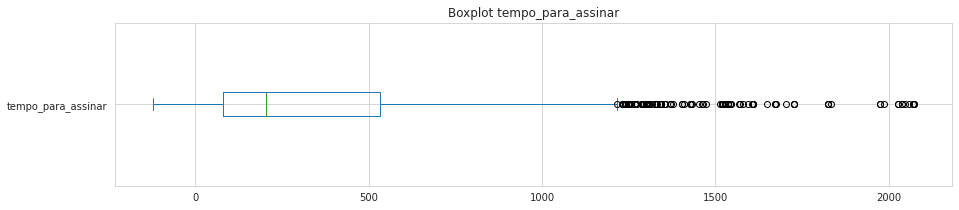

In [29]:
# Boxplot tempo_para_assinar
df_2.tempo_para_assinar.plot.box(vert=False, figsize = (15,3));
plt.title('Boxplot tempo_para_assinar')
plt.show()


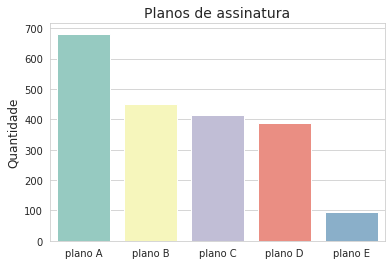

In [30]:
#Tipos de plano
sns.countplot(x = 'tipo_plano', data = df_2, order = df_2['tipo_plano'].value_counts().index, palette="Set3")

plt.title("Planos de assinatura", fontsize=14)
plt.xlabel("", fontsize=10)
plt.ylabel("Quantidade", fontsize=12)
plt.show()

No gráfico de barras acima, é possível verificar que o tipo de plano mais escolhido pelos clientes é referente ao **Plano A**. Os **Planos B, C e D** estão relativamente próximo em relação ao número de cadastros que selecionaram esses planos. E o **Plano E** é o que possui o menor número de cadastros.

In [48]:
df_2.query("tipo_plano == 'plano A'")['valor_assinatura'].unique() 
# df_2[['tipo_plano', 'valor_assinatura']].head()

array([89.9, 99.9])

In [31]:
#estatística descritiva relacionada ao plano A
df_2.query("tipo_plano == 'plano A'").describe() 

,id_Perfil,valor_assinatura,dia_pagamento,tempo_para_assinar
count,6.820000e+02,682.000000,682.000000,682.000000
mean,2.700606e+05,94.064223,14.969208,386.777126
std,1.951373e+05,4.933271,8.393791,441.178282
min,2.124300e+04,89.900000,1.000000,-122.000000
25%,1.301195e+05,89.900000,8.000000,77.000000
50%,2.522155e+05,89.900000,14.000000,187.000000
75%,3.774165e+05,99.900000,22.000000,584.500000
max,1.299813e+06,99.900000,31.000000,2072.000000


Obtendo apenas os dados relacionados ao **Plano A** através do método **query()**, foi construído um modelo de estatística descritiva que nos mostra importantes informações referente ao **Plano A** a partir do método **describe()**. 

É possível verificar uma relação entre o **tempo** que leva para um cliente realizar a assinatura no **Plano A**. Podemos verificar que **75%** dos clientes levam até **584 dias** para assinar o **Plano A** e em média, todos os clientes levam aproximadamente **387 dias** para assinar o **Plano A**.

*(Independente se o **status da inscrição** está ativa ou não)*

**Foi realizado o mesmo passo para os próximos planos**

In [32]:
#estatística descritiva relacionada ao plano B
df_2.query("tipo_plano == 'plano B'").describe()

,id_Perfil,valor_assinatura,dia_pagamento,tempo_para_assinar
count,4.500000e+02,450.000000,450.000000,450.000000
mean,2.758173e+05,380.611111,16.686667,380.155556
std,2.007559e+05,20.009599,8.350722,403.074695
min,2.026700e+04,359.900000,1.000000,-121.000000
25%,1.416130e+05,359.900000,10.000000,85.000000
50%,2.576170e+05,399.900000,16.500000,240.500000
75%,3.776848e+05,399.900000,25.000000,516.500000
max,1.299811e+06,399.900000,31.000000,2048.000000


In [33]:
#estatística descritiva relacionada ao plano C
df_2.query("tipo_plano == 'plano C'").describe()

,id_Perfil,valor_assinatura,dia_pagamento,tempo_para_assinar
count,4.130000e+02,413.000000,413.000000,413.000000
mean,2.812601e+05,47.248668,16.324455,366.631961
std,2.333978e+05,2.498442,8.362904,406.308578
min,2.013600e+04,44.900000,1.000000,-121.000000
25%,1.331270e+05,44.900000,9.000000,76.000000
50%,2.461690e+05,44.900000,16.000000,225.000000
75%,3.849350e+05,49.900000,24.000000,525.000000
max,1.299812e+06,49.900000,31.000000,2072.000000


In [34]:
#estatística descritiva relacionada ao plano D
df_2.query("tipo_plano == 'plano D'").describe()

,id_Perfil,valor_assinatura,dia_pagamento,tempo_para_assinar
count,3.870000e+02,387.000000,387.000000,387.000000
mean,2.841979e+05,56.458140,14.829457,381.449612
std,2.194232e+05,2.971123,8.478981,418.844400
min,2.294300e+04,53.900000,1.000000,-122.000000
25%,1.331790e+05,53.900000,8.000000,85.000000
50%,2.595150e+05,53.900000,14.000000,202.000000
75%,3.738290e+05,59.900000,22.000000,548.500000
max,1.299816e+06,59.900000,31.000000,2069.000000


In [35]:
#estatística descritiva relacionada ao plano E
df_2.query("tipo_plano == 'plano E'").describe()

,id_Perfil,valor_assinatura,dia_pagamento,tempo_para_assinar
count,9.500000e+01,95.000000,95.000000,95.000000
mean,3.005885e+05,286.321053,17.126316,374.589474
std,2.523344e+05,15.011754,8.346540,437.549620
min,2.613700e+04,269.900000,1.000000,-122.000000
25%,1.452220e+05,269.900000,11.500000,89.000000
50%,2.407030e+05,299.900000,18.000000,202.000000
75%,3.982655e+05,299.900000,25.000000,507.500000
max,1.299815e+06,299.900000,31.000000,2069.000000


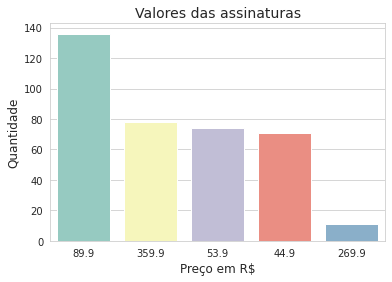

In [41]:
#Valor de assinatura nos usuários ativos
df_2_status = df_2.query("status_inscricao == 'ativo'")
sns.countplot(x = 'valor_assinatura', data = df_2_status, order = df_2_status['valor_assinatura'].value_counts().index, palette="Set3")

plt.title("Valores das assinaturas", fontsize=14)
plt.xlabel("Preço em R$", fontsize=12)
plt.ylabel("Quantidade", fontsize=12)
plt.show()

Em relação aos valores das assinaturas, a partir do gráfico de barra plotado acima é possível verificar que há uma grande quantidade de assinatura no plano que custa **89,99** e uma menor assinatura nos planos cujo valor são **269,99**

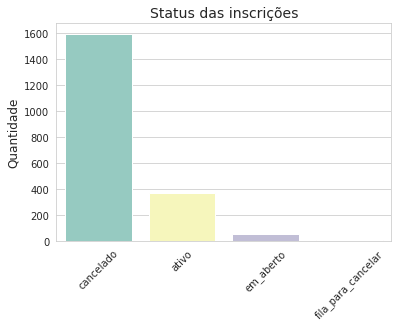

In [37]:
#status da inscrição
sns.countplot(x = 'status_inscricao', data = df_2, order = df_2['status_inscricao'].value_counts().index, palette="Set3")

plt.title("Status das inscrições", fontsize=14)
plt.xlabel("", fontsize=12)
plt.ylabel("Quantidade", fontsize=12)
plt.xticks(rotation=45)
plt.show()

Acima refere-se ao gráfico de barras dos status de inscrições. Claramente é possível verificar que o número de assinaturas canceladas é maior em relação aos outros status.

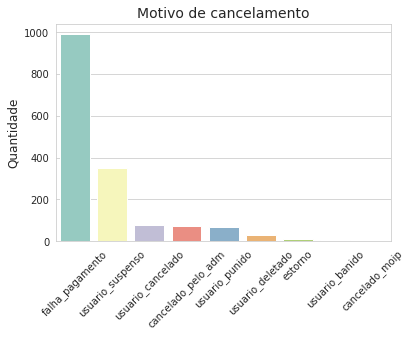

In [38]:
#motivo de cancelamento
sns.countplot(x = 'motivo_cancelamento', data = df_2, order = df_2['motivo_cancelamento'].value_counts().index, palette="Set3")

plt.title("Motivo de cancelamento", fontsize=14)
plt.xlabel("", fontsize=12)
plt.ylabel("Quantidade", fontsize=12)
plt.xticks(rotation=45)
plt.show()

O gráfico acima é relacionado ao motivo que levou o cliente a cancelar a assinatura. Com grande relevância a **falha de pagamento** é um importante fator de cancelamento. Em seguida o **usuário suspenso** levou o cancelamento da assinatura.

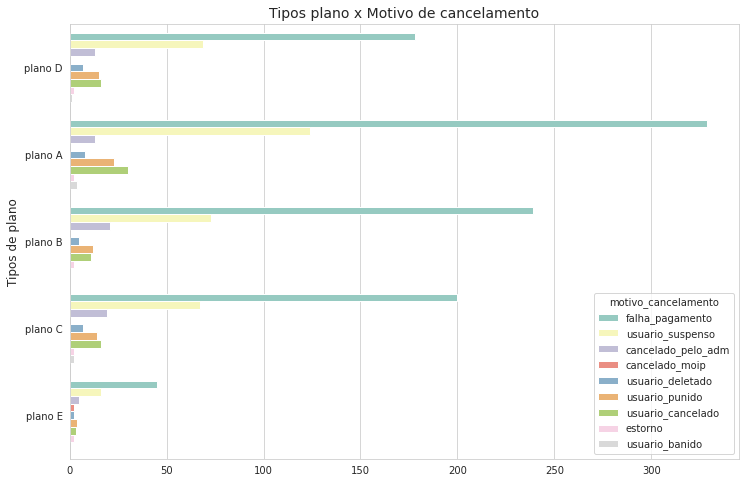

In [39]:
#tipo_plano x motivo_cancelamento
ax=sns.countplot(y="tipo_plano", hue="motivo_cancelamento", data=df_2, palette="Set3")
ax.figure.set_size_inches(12, 8)

plt.title("Tipos plano x Motivo de cancelamento", fontsize=14)
plt.xlabel("", fontsize=12)
plt.ylabel("Tipos de plano", fontsize=12)
plt.show()

O gŕafico acima demonstra os motivos de cancelamento das assinatura em relação ao tipo de plano escolhido. É possível verificar que os motivos: **falha no pagamento e usuário suspenso** são os que apresenta maior quantidade em todos os planos. Conclui-se que a **falha no pagamento** é o fator mais importante para o usuário cancelar o plano.

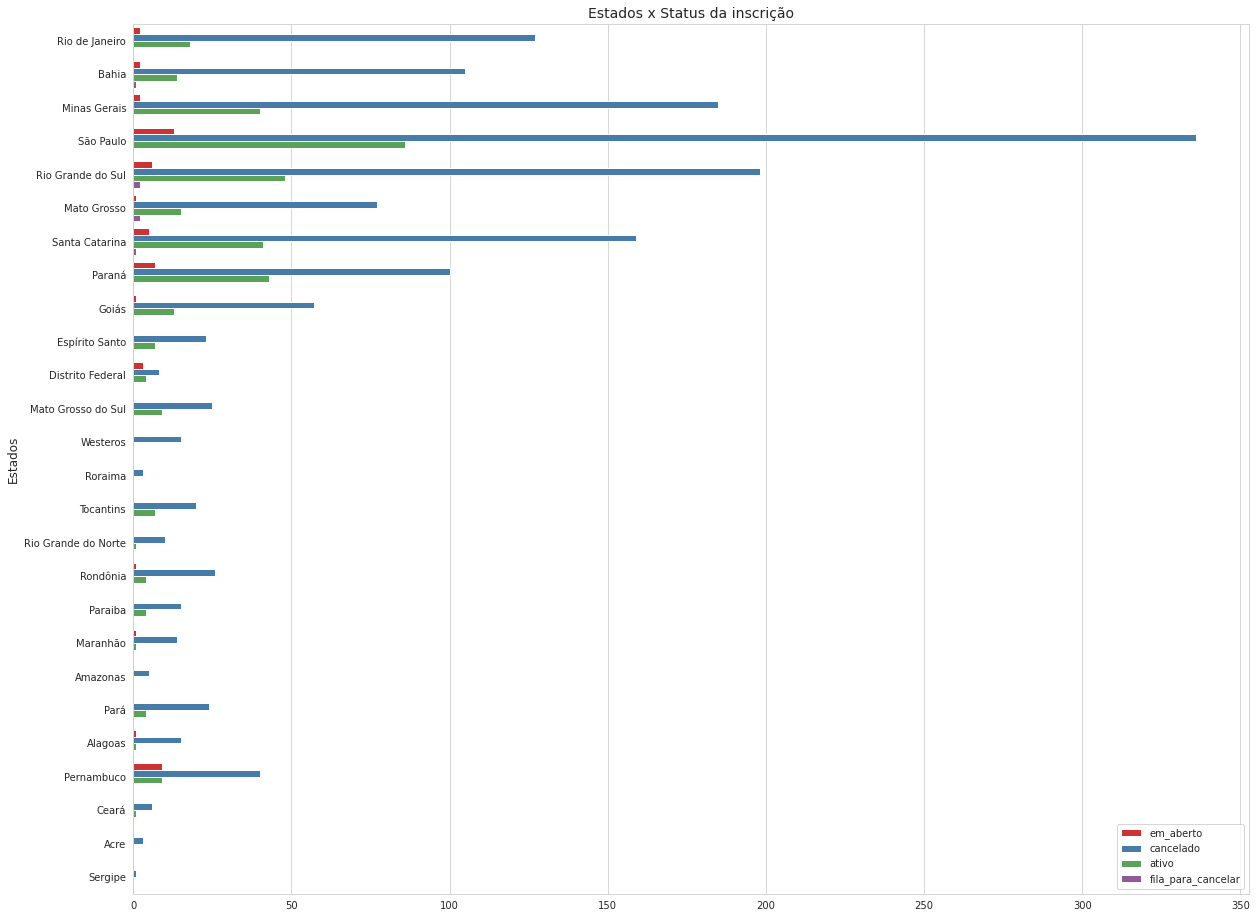

In [50]:
ax=sns.countplot(y="estado", hue="status_inscricao", data=df_2, palette="Set1")
ax.figure.set_size_inches(20, 16)

plt.title("Estados x Status da inscrição", fontsize=14)
plt.xlabel("", fontsize=12)
plt.ylabel("Estados", fontsize=12)
plt.legend(loc='lower right')
plt.savefig('estados.png', format='png')
plt.show()


Acima podemos verificar que em todos os **Estados**, o número de assinaturas canceladas são superiores. Em relação às **assinaturas ativas** o Estados de **São Paulo** corresponde a maioria, em seguida **Rio Grande do Sul, Paraná, Santa Catarina e Minas Gerais** possuem uma maior número de assinaturas ativas em comparação aos outros estados.